In [61]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd  # pandas for data manipulation
import numpy as np  # numpy for numerical computations and array operations
import matplotlib.pyplot as plt  # matplotlib for plotting
%matplotlib inline
import seaborn as sns  # seaborn for advanced visualization
pd.options.display.float_format = '{:.2f}'.format  # Setting display format for floating-point numbers
import warnings
warnings.filterwarnings('ignore')  # Suppressing warning messages


In [62]:
data = pd.read_csv('../Dataset/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [63]:
data.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
879,48,M,ATA,110,229,0,Normal,168,N,1.00,Down,1
446,54,M,ASY,130,0,0,ST,117,Y,1.40,Flat,1
718,57,M,ASY,165,289,1,LVH,124,N,1.00,Flat,1
723,59,M,ASY,140,177,0,Normal,162,Y,0.00,Up,1
304,51,M,ASY,95,0,1,Normal,126,N,2.20,Flat,1


In [64]:
"""
This code snippet performs the following tasks:

- Identifying categorical and numerical features in the dataset
- Printing the lists of categorical and numerical features

"""

col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features : Age RestingBP Cholesterol MaxHR Oldpeak


# Feature Engineering

## Encoding Categorical Variables

In [65]:
"""
This code snippet performs label encoding on categorical features using the `LabelEncoder` from the `sklearn.preprocessing` 
module.

Label encoding replaces categorical values with numerical labels, enabling machine learning algorithms to process them
as input.

"""

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1 = data.copy(deep = True)

df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])

## Data Scaling

In [66]:
# """
# This code snippet performs feature scaling on numerical features using the `MinMaxScaler` and `StandardScaler` from 
# the `sklearn.preprocessing` module.
# """

# from sklearn.preprocessing import MinMaxScaler,StandardScaler
# mms = MinMaxScaler() # Normalization
# ss = StandardScaler() # Standardization

# df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])
# df1['Age'] = ss.fit_transform(df1[['Age']])
# df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
# df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
# df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])
# df1.head()

## Correlation Matrix

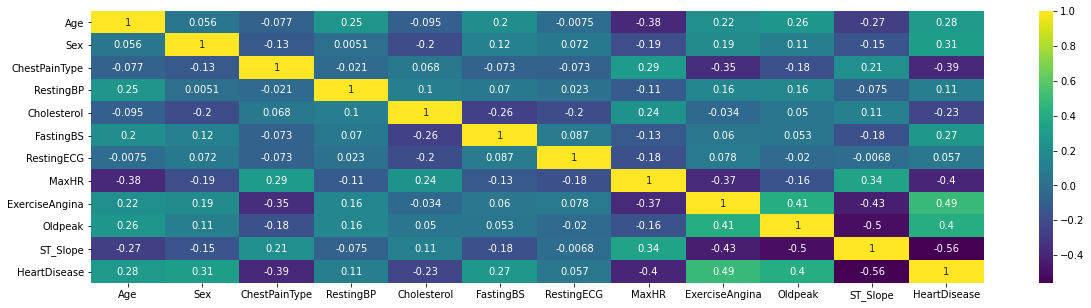

In [67]:
plt.figure(figsize = (20,5))
sns.heatmap(df1.corr(),cmap = 'viridis',annot = True);

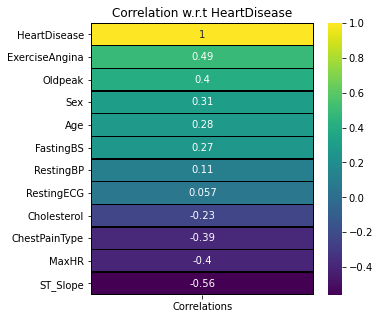

In [68]:
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = 'viridis',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

# Feature Selection for Categorical Features

## Chi Squared Test 
- The Chi-Squared Test is used to determine the independence or association between two categorical variables in a dataset.
- It helps us understand whether there is a significant relationship between these variables or if any observed association is due to chance. 

In [69]:
colors = ['#F93822','#FDD20E']

In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

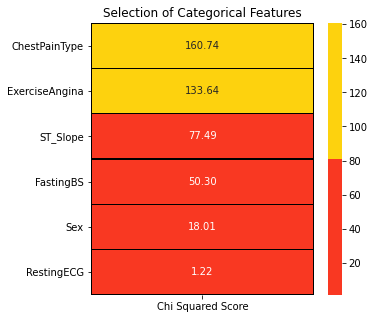

In [71]:
"""
This code snippet performs feature selection using the chi-squared statistical test.

Here is a summary of the steps:
- The code selects the categorical features from the `df1` dataframe.
- The target variable is also selected.
- The `SelectKBest` function from `sklearn.feature_selection` is used with the `chi2` scoring function to calculate the chi-squared scores for each feature.
- The scores are stored in a DataFrame named `featureScores`, with the feature names as the index and the chi-squared scores as the column.
- A heatmap is created using `seaborn.heatmap` to visualize the feature scores, with higher scores indicating higher importance.
- The plot is customized with the chosen colormap, linewidths, linecolor, and title.
"""

features = df1.loc[:,categorical_features[:-1]]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

### Conclusion
- From the above test, we can see that except RestingECG, all other ctaegorical features are important. 
- So, we are going to ignore the RestingECG feature

# Feature Selection for Numerical Features

## ANOVA Test

- The main purpose of the ANOVA test is to investigate whether there is a significant difference in means among the groups being compared. 
- It is commonly used in research and experimental studies to analyze the impact of different factors or treatments on a dependent variable. 
- By using ANOVA, we can identify which groups significantly differ from each other, providing valuable insights into the effects of different variables or interventions.

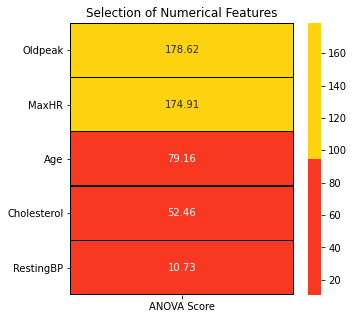

In [72]:
"""
This code snippet performs feature selection using the ANOVA (Analysis of Variance) statistical test.

Here is a summary of the steps:
- The code selects the numerical features from the `df1` dataframe.
- The target variable is also selected.
- The `SelectKBest` function from `sklearn.feature_selection` is used with the `f_classif` scoring function to calculate the ANOVA scores for each feature.
- The scores are stored in a DataFrame named `featureScores`, with the feature names as the index and the ANOVA scores as the column.
- A heatmap is created using `seaborn.heatmap` to visualize the feature scores, with higher scores indicating higher importance.
- The plot is customized with the chosen colormap, linewidths, linecolor, and title.
"""

from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

### Conclusions :
- We will leave out RestingBP from the modeling part and take the remaining features.

# Modeling

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, plot_roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [74]:
features = df1[df1.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df1['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [75]:
def model(classifier):
    
    """
    Function to evaluate and visualize the performance of a classifier.

    Args:
        classifier: The classifier object to be evaluated.

    Returns:
        None (prints evaluation results and displays plot)
    """
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

    
    
def model_evaluation(classifier):
        print(classification_report(y_test,classifier.predict(x_test)))

## Logistic Regression Model

- Logistic regression is a statistical model used to predict binary outcomes by estimating the probability of an event occurring based on input variables. 
- It assumes a linear relationship between the independent variables and the log-odds of the dependent variable, which is then transformed using a sigmoid function to obtain the predicted probabilities.
- Logistic regression is commonly used for binary classification tasks and provides interpretable coefficients that indicate the impact of each variable on the outcome.

In [76]:
from sklearn.linear_model import LogisticRegression

Accuracy :  85.33%
Cross Validation Score :  91.03%
ROC_AUC Score :  85.22%


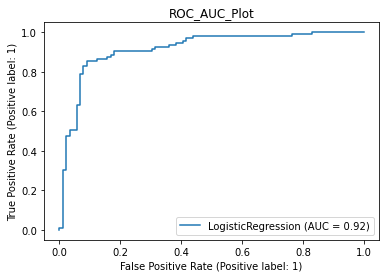

In [77]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 
model(classifier_lr)

In [78]:
model_evaluation(classifier_lr)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        89
           1       0.84      0.88      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



## Support Vector Machine
- Support Vector Machines (SVM) is a powerful supervised machine learning algorithm used for classification and regression tasks. 
- SVM aims to find an optimal hyperplane that maximally separates the different classes in the input data. It achieves this by creating a decision boundary or a set of decision boundaries that maximize the margin between the support vectors, which are the data points closest to the decision boundary. 
- SVM can handle linear and non-linear data through the use of different kernels, such as linear, polynomial, radial basis function (RBF), and sigmoid. SVM is known for its ability to handle high-dimensional data and its robustness against overfitting.

In [79]:
from sklearn.svm import SVC

Accuracy :  85.33%
Cross Validation Score :  90.72%
ROC_AUC Score :  85.29%


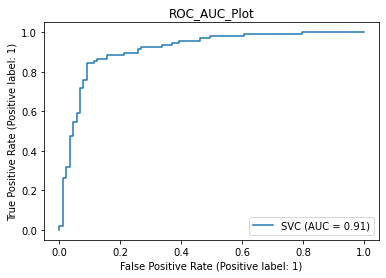

In [80]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)
model(classifier_svc)

In [81]:
model_evaluation(classifier_svc)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85        89
           1       0.85      0.86      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



## Decision Tree

- Decision Tree is a versatile supervised machine learning algorithm used for both classification and regression tasks. It builds a tree-like model by partitioning the feature space based on the values of input features.
- The algorithm selects the best feature at each node based on certain criteria (e.g., Gini impurity or information gain) to create decision rules and split the data into subsets. 
- This process is recursively repeated until the tree is fully grown or a stopping criterion is met. Decision trees are interpretable, as they can be visualized, and they can handle both categorical and numerical data. 
- They can capture non-linear relationships, interactions, and feature importance. Decision trees are prone to overfitting, but techniques like pruning and ensemble methods can help mitigate this issue.

In [82]:
from sklearn.tree import DecisionTreeClassifier

Accuracy :  83.70%
Cross Validation Score :  89.38%
ROC_AUC Score :  83.50%


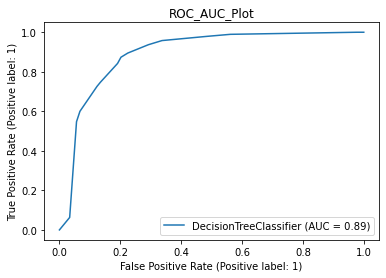

In [83]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 3)
model(classifier_dt)

In [84]:
model_evaluation(classifier_dt)

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        89
           1       0.81      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



## Random Forest

- Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. 
- It constructs a multitude of decision trees using random subsets of the training data and random subsets of the input features. Each tree is trained independently on different subsets of the data, and the final prediction is made by aggregating the predictions of all the individual trees. 
- This ensemble approach helps to reduce overfitting and improve the overall prediction accuracy. Random Forest is effective for both classification and regression tasks and can handle large datasets with high-dimensional feature spaces. It can capture complex relationships, interactions, and feature importance. 
- Random Forest is known for its robustness, scalability, and resistance to outliers and noisy data.

In [85]:
from sklearn.ensemble import RandomForestClassifier

Accuracy :  84.24%
Cross Validation Score :  92.91%
ROC_AUC Score :  84.06%


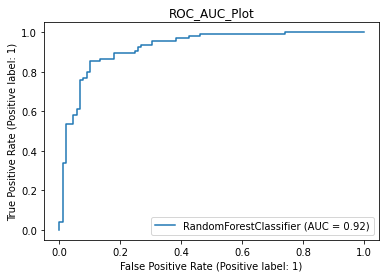

In [86]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)
model(classifier_rf)

In [87]:
model_evaluation(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



## K-Nearest Neighbors 

- K-Nearest Neighbors (KNN) is a simple yet effective algorithm used for both classification and regression tasks. In KNN, data points are represented as vectors in a high-dimensional space. 
- To make a prediction for a new data point, the algorithm looks at the K nearest neighbors (data points) based on a distance metric (e.g., Euclidean distance) and assigns the majority class label (in classification) or calculates the average value (in regression) of those K neighbors. 
- KNN does not involve any explicit training process as it stores all the training data points in memory. It is a non-parametric algorithm that can adapt well to complex decision boundaries. However, the performance of KNN can be affected by the choice of the value of K and the distance metric used. 
- It is also sensitive to the scale of the input features. Therefore, scaling the data is often recommended before applying KNN.

In [88]:
from sklearn.neighbors import KNeighborsClassifier

Accuracy :  73.37%
Cross Validation Score :  78.08%
ROC_AUC Score :  73.18%


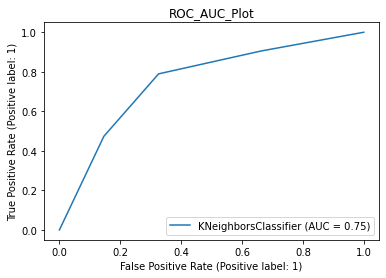

In [89]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)
model(classifier_knn)

In [90]:
model_evaluation(classifier_knn)

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        89
           1       0.72      0.79      0.75        95

    accuracy                           0.73       184
   macro avg       0.74      0.73      0.73       184
weighted avg       0.74      0.73      0.73       184



# Optuna 

https://optuna.readthedocs.io/en/stable/

## What is Optuna 

- Optuna is a hyperparameter optimization framework for machine learning. 
- It is designed to automate the process of finding the best set of hyperparameters for a given machine learning model. 
- Optuna uses an efficient algorithm called Tree-structured Parzen Estimator (TPE) to explore the hyperparameter search space and find the optimal combination of hyperparameters that maximize or minimize a defined objective function.

## Why do we use Optuna

- The primary reason for using Optuna is to improve the performance and generalization of machine learning models. By optimizing hyperparameters, Optuna helps in fine-tuning the model's parameters, leading to better accuracy, faster convergence, and improved robustness. 
- It automates the tedious and time-consuming process of manually tuning hyperparameters, making it easier and more efficient to experiment with different configurations. 
- Optuna's ability to handle various types of hyperparameters and support for distributed computing further enhance its usability and scalability in optimizing models.

In [91]:
import optuna

## Optimizing Random Forest Algorithm 

In [92]:

"""
This function 'objective' is used as the objective function for optimizing hyperparameters of a 
Random Forest Classifier using Optuna.

Input:

trial: The Optuna trial object that suggests hyperparameters for each iteration.
Output:

accuracy: The accuracy score of the Random Forest Classifier model with the suggested hyperparameters on the test data.
"""

# def objective(trial):
#     max_depth = trial.suggest_int('max_depth', 2, 50)
#     n_estimators = trial.suggest_int('n_estimators', 100, 10000, step=100)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)

#     classifier_rf = RandomForestClassifier(
#         max_depth=max_depth,
#         n_estimators=n_estimators,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         random_state=0
#     )

#     classifier_rf.fit(x_train, y_train)
#     y_pred = classifier_rf.predict(x_test)
#     accuracy = accuracy_score(y_test, y_pred)
    
#     return accuracy


# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=10)

# best_params = study.best_params
# best_accuracy = study.best_value

# print("Best Parameters:", best_params)
# print("Best Accuracy:", best_accuracy)

"\nThis function 'objective' is used as the objective function for optimizing hyperparameters of a \nRandom Forest Classifier using Optuna.\n\nInput:\n\ntrial: The Optuna trial object that suggests hyperparameters for each iteration.\nOutput:\n\naccuracy: The accuracy score of the Random Forest Classifier model with the suggested hyperparameters on the test data.\n"

Accuracy :  84.24%
Cross Validation Score :  92.93%
ROC_AUC Score :  84.06%


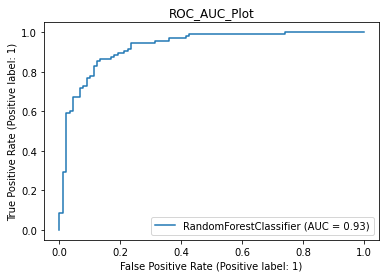

In [93]:
# trying set 1 of params

classifier_rf_1 = RandomForestClassifier(max_depth = 8, n_estimators = 7900, min_samples_split = 10, min_samples_leaf = 1)
model(classifier_rf_1)

In [94]:
model_evaluation(classifier_rf_1)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



Accuracy :  85.33%
Cross Validation Score :  93.12%
ROC_AUC Score :  85.15%


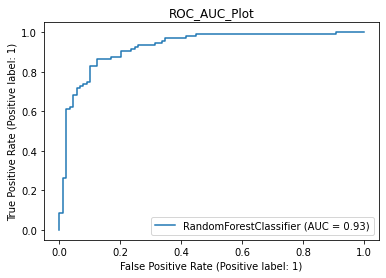

In [95]:
# trying out set 2 of params

classifier_rf_2 = RandomForestClassifier(max_depth=34, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=7000)
model(classifier_rf_2)

In [96]:
model_evaluation(classifier_rf_2)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        89
           1       0.83      0.91      0.86        95

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



## Optimizing SVM Algorithm

**Warning: SVM hyperparameter tuning may take a long time (many hours).The code for SVM hyperparameter tuning is commented out.If you have sufficient computational resources and time, you can uncomment it and search for better hyperparameters.**
<br>
<br>
*The current best parameters took 100 trials*

In [97]:

"""
This function 'objective' is used as the objective function for optimizing hyperparameters of a 
SVM using Optuna.

Input:

trial: The Optuna trial object that suggests hyperparameters for each iteration.
Output:

accuracy: The accuracy score of the SVM model with the suggested hyperparameters on the test data.
"""

# def objective(trial):
    
#     C = trial.suggest_float('C', 0.1, 10)
#     kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
#     gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])


#     classifier_svm = SVC(
#         C=C,
#         kernel=kernel,
#         gamma=gamma,
#         random_state=0
#     )

#     classifier_svm.fit(x_train, y_train)
#     y_pred = classifier_svm.predict(x_test)
#     accuracy = accuracy_score(y_test, y_pred)
    
#     return accuracy


# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

# best_params = study.best_params
# best_accuracy = study.best_value

# print("Best Parameters:", best_params)
# print("Best Accuracy:", best_accuracy)

"\nThis function 'objective' is used as the objective function for optimizing hyperparameters of a \nSVM using Optuna.\n\nInput:\n\ntrial: The Optuna trial object that suggests hyperparameters for each iteration.\nOutput:\n\naccuracy: The accuracy score of the SVM model with the suggested hyperparameters on the test data.\n"

Accuracy :  86.96%
Cross Validation Score :  90.73%
ROC_AUC Score :  86.91%


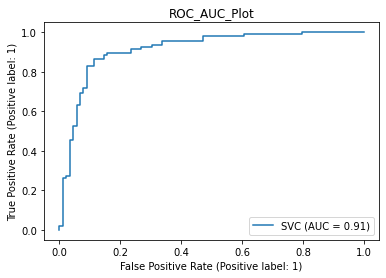

In [98]:
classifier_svc_1 = SVC(kernel = 'linear',C = 0.27493653568622456, gamma='scale')
model(classifier_svc_1)

In [100]:
model_evaluation(classifier_svc_1)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        89
           1       0.87      0.88      0.87        95

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



## Optimizing Logistic Regression 

In [101]:

"""
This function 'objective' is used as the objective function for optimizing hyperparameters of a 
Logistic Regressor using Optuna.

Input:

trial: The Optuna trial object that suggests hyperparameters for each iteration.
Output:

accuracy: The accuracy score of the Logistic Regression model with the suggested hyperparameters on the test data.
"""

# def objective(trial):
    
#     C = trial.suggest_float('C', 0.1, 10)
#     penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
#     solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])

#     classifier_lr = LogisticRegression(
#         C=C,
#         penalty=penalty,
#         solver=solver,
#         random_state=0
#     )

#     classifier_lr.fit(x_train, y_train)
#     y_pred = classifier_lr.predict(x_test)
#     accuracy = accuracy_score(y_test, y_pred)
    
#     return accuracy


# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=1000)

# best_params = study.best_params
# best_accuracy = study.best_value

# print("Best Parameters:", best_params)
# print("Best Accuracy:", best_accuracy)

"\nThis function 'objective' is used as the objective function for optimizing hyperparameters of a \nLogistic Regressor using Optuna.\n\nInput:\n\ntrial: The Optuna trial object that suggests hyperparameters for each iteration.\nOutput:\n\naccuracy: The accuracy score of the Logistic Regression model with the suggested hyperparameters on the test data.\n"

Accuracy :  86.96%
Cross Validation Score :  90.94%
ROC_AUC Score :  86.87%


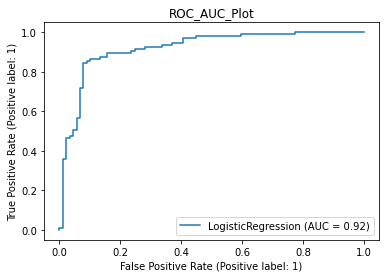

In [102]:
classifier_lr_1 = LogisticRegression(random_state = 0, C=0.2672504885085959, penalty= 'l1', solver='liblinear') 
model(classifier_lr_1)

In [103]:
model_evaluation(classifier_lr_1)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        89
           1       0.86      0.89      0.88        95

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



## General function to optimize any classifier 
- Since we had to write the function seperately for each classifier, it would be better to make one single function to tune the hyper parameters of all the classifiers using Optuna
- This is what I came up with, but it does not work

In [104]:

"""
optimize_classifier is a function that performs hyperparameter optimization for a given classifier using Optuna.
It uses the Optuna library to search for the best combination of hyperparameters that maximize accuracy.

Input:
- classifier: An instance of the classifier model to be optimized.
- X: The input features for training and testing the classifier.
- y: The target variable for training and testing the classifier.

Output:
- None (The function prints the best parameters and best accuracy obtained during optimization.)

Note: This function does not work as intended and throws an error

"""

# def optimize_classifier(classifier, X, y):
#     def objective(trial):
#         params = {}

#         for param_name, param_range in classifier.get_params().items():
#             if isinstance(param_range, list):
#                 param_value = trial.suggest_categorical(param_name, param_range)
#             else:
#                 param_value = trial.suggest_int(param_name, param_range[0], param_range[1])

#             params[param_name] = param_value

#         optimized_classifier = classifier.model(**params)
#         optimized_classifier.fit(X_train, y_train)
#         y_pred = optimized_classifier.predict(X_test)
#         accuracy = accuracy_score(y_test, y_pred)

#         return accuracy

# #     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#     study = optuna.create_study(direction='maximize')
#     study.optimize(objective, n_trials=100)

#     best_params = study.best_params
#     best_accuracy = study.best_value

#     print("Best Parameters:", best_params)
#     print("Best Accuracy:", best_accuracy)

'\noptimize_classifier is a function that performs hyperparameter optimization for a given classifier using Optuna.\nIt uses the Optuna library to search for the best combination of hyperparameters that maximize accuracy.\n\nInput:\n- classifier: An instance of the classifier model to be optimized.\n- X: The input features for training and testing the classifier.\n- y: The target variable for training and testing the classifier.\n\nOutput:\n- None (The function prints the best parameters and best accuracy obtained during optimization.)\n\nNote: This function does not work as intended and throws an error\n\n'

## Exporting our models

In [105]:
import pickle

In [106]:
pickle.dump(classifier_lr_1, open('Models/lr_model.pkl', 'wb'))

In [107]:
pickle.dump(classifier_svc_1, open('Models/svc_model.pkl', 'wb'))

In [108]:
pickle.dump(classifier_dt, open('Models/dt_model.pkl', 'wb'))

In [109]:
pickle.dump(classifier_rf_2, open('Models/rf_model.pkl', 'wb'))

In [110]:
pickle.dump(classifier_knn, open('Models/knn_model.pkl', 'wb'))